In [5]:
import os

dirs=['Stk_1F_2015','Stk_1F_2016']




    

In [4]:
import time
import os

#print readable information
def readline(ls):
    stock={}
    stock['date'],stock['time'],stock['open_price'],stock['max_price'],stock['close_price'],stock['min_price'],stock['amount'],stock['volumn']=ls[0],ls[1],ls[2],ls[3],ls[4],ls[5],ls[6],ls[7]
    for k,v in stock.items():
        print('{}:{}'.format(k,v))
    return stock

#read stocks with director array
def readdirs(dirs):
    stocks=[]
    for d in dirs:
        fileList = []
        files = os.listdir(d)
        for f in files:  
            path=d+'/'+f
            if(os.path.isfile(path)):
                fileList.append(path)
    
    stocks=readfiles(fileList)
    return stocks

#read stocks with file path list 
def readfiles(fileList):
    stocks={}
    for path in fileList:  
        if(os.path.isfile(path)):
            id=path.split('/')[-1][:-4]
            stocks[id]=readfile(path)
    return stocks

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
        
    
    return stock
   
#return stock information with stock id, date and time    
def search(stocks,stock_id,date,time):
    if stock_id not in stocks.keys():
        return None
    else:
        stock = stocks[stock_id]
        for s in stock:
            if s[0]==date and s[1]==time:
                return s
    return None
   
#used to return stocks in [yy,zz] days interval
def readfiles_input_days(fileList,yy,zz):
    stocks={}
    for path in fileList:  
        if(os.path.isfile(path)):
            id=path.split('/')[-1][:-4]
            stocks[id]=readfile_input_days(path,yy,zz)
    return stocks

#used to return stocks in [yy,zz] days interval
def readfile_input_days(file,yy,zz):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        
        if compare_time(yy,ls[0],zz):
            stock.append(ls)
        
    return stock

# return True if time is in the [start,end] interval
def compare_time(start,tm,end):
    s=time.strptime(start,'%Y/%m/%d')
    e=time.strptime(end,'%Y/%m/%d')
    t=time.strptime(tm,'%Y/%m/%d')
    
    return t>=s and t<=e

# dirs=['Stk_1F_2015','Stk_1F_2016']
# stocks=readfile('Stk_1F_2015/SH000001.csv')
# stocks=readdirs(['Stk_1F_2015'])
# fileList=['Stk_1F_2015/SH000001.csv','Stk_1F_2015/SH000002.csv']
# stocks=readfiles(fileList)
# readline(search(stocks,'SH000002','2015/01/05','09:31'))
# stocks=readfiles_input_days(fileList,'2015/01/05','2015/01/05')
# compare_time('2015/01/05','2015/01/03','2015/02/05')



In [5]:
print(stocks['SH000001'][0])

['2015/01/05', '09:31', '3258.627', '3263.039', '3258.627', '3259.852', '13236746.00', '13907082240.00']


In [6]:
compare_time('2015/01/05','2015/01/08','2015/02/05')

True

In [9]:
#return the number of days when a stock 's daily closing price > daily opening price
def count_special_days(stock):
    count=0
    for i in range(len(stock)):
        if stock[i][5]>stock[i][2]:
            count+=1
    return count
count_special_days(stocks['SH000001'])

29740

In [10]:
from multiprocessing import Pool

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
        
    
    return stock

def mymap(processes,f, *args):
    if not args or not f or not processes:
        raise Exception('Illegal input')

    a=args[0]

    tmp={}
    p=Pool(processes)
    for i in range(len(a)):
        tmp[i]=p.apply_async(f,args=(a[i],)).get()

    p.close()
    p.join()

    #sort the result by the input order
    keys = list(tmp.keys())
    keys.sort()
    results = [tmp[key] for key in keys]
    return results


def myreduce(f, *args):
    if not args or not f:
        raise Exception('Illegal input')

    a = args[0]
    if len(a)==0:
        raise Exception('Illegal input')

    result=a[0]
    for i in range(1,len(a)):
        result=f(result,a[i])

    return result

In [6]:
from multiprocessing import Pool
import json
import os

#read stocks with director array
def get_fileList(dirs):
    for d in dirs:
        fileList = []
        files = os.listdir(d)
        for f in files:  
            path=d+'/'+f
            if(os.path.isfile(path)):
                fileList.append(path)
    
    return fileList

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
    
    return stock



def write_output(outputs):
    with open('close>open.out','w') as f:
        for i in outputs:
            f.write(str(i)+'\n')
        
def combine_output(o1,o2):
    o1.extend(o2)
    return o1

def count_days(filename):
    stock = readfile(filename)
    
    count=0
    
    days=set()
    for line in stock:
        days.add(line[0])
    days=list(days)
    
    for day in days:
        count+=isHigher(stock,day)
    
    return (filename.split('/')[-1][:-4],count)
            
def isHigher(stock,day):
    start,end=0.0,0.0
    for line in stock:
        if line[0]==day:
            if line[1]=='09:31':
                start=float(line[2])
            elif line[1]=='15:00':
                end = float(line[5])
                break
    if end>start:
        return 1
    else:
        return 0

def myreduce(func, *args):
    if not args or not func:
        raise Exception('Illegal input')

    result=args[0]
    for i in range(1,len(args)):
        result=func(result,args[i])
    

    return result


def mymap(func, *args):
    if not args or not func:
        raise Exception('Illegal input')

    a=args[0]
    
    result=[]

    for i in a:
        result.append(func(i))
        
    return result



def control(fileList,processes):
    p=Pool(processes)
    outputs=[]
    
    for filename in fileList:
        one=p.apply_async(mymap,args=(count_days,[filename],)).get()
        outputs=p.apply_async(myreduce,args=(combine_output,outputs,one)).get()
        
    p.close()
    p.join()
    
    
    
    print(outputs)
    write_output(outputs)
    
if __name__=='__main__':

    processes=6

    directorys=['Stk_1F_2016']

    fileList=get_fileList(directorys)

    # fileList=['Stk_1F_2015/SH000001.csv','Stk_1F_2015/SH000002.csv']

    control(fileList,processes)
    


    

Process ForkPoolWorker-18:
Process ForkPoolWorker-16:
Process ForkPoolWorker-14:


KeyboardInterrupt: 

Process ForkPoolWorker-13:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line

In [4]:
import time
a=time.time()
time.sleep(10)
b=time.time()
print(b-a)

10.010151147842407


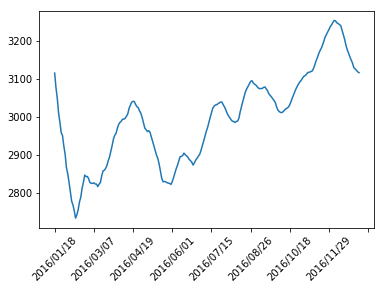

In [79]:
#lab3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json

#read stocks with director array
def get_fileList(dirs):
    for d in dirs:
        fileList = []
        files = os.listdir(d)
        for f in files:  
            path=d+'/'+f
            if(os.path.isfile(path)):
                fileList.append(path)
    
    return fileList

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
    
    return stock

def get_closing_prices(stock):
    days=[]
    closing_prices=[]
    for line in stock:
        if line[1]=='15:00':
            days.append(line[0])
            closing_prices.append(float(line[-3]))
    return days,closing_prices
    

def get_avgs(stock,interval,save,filename):
    days,closing_prices=get_closing_prices(stock)

    length=len(closing_prices)
    if length<=interval:
        return [],[]
    
    avgs=[ sum(closing_prices[i-interval:i])/interval for i in range(interval,length)]
    days=days[interval:]
    
    if save:
        with open('{}_ma.out'.format(filename),'w') as f:
            f.write(json.dumps(days))
            f.write('\n')
            f.write(json.dumps(avgs))
    
    return days,avgs
        
def plot_avgs(days,avgs):
    tick_spacing=30
    fig, ax = plt.subplots(1,1)
    ax.tick_params(axis='x', rotation=45)
    ax.plot(days,avgs)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.savefig("avgs.png")
    plt.show()

if __name__=='__main__':

#     directorys=['Stk_1F_2016']
#     fileList=get_fileList(directorys)
#     fileList=['Stk_1F_2015/SH000001.csv','Stk_1F_2015/SH000002.csv']
    
    stock_path='Stk_1F_2016/SH000001.csv'
    save_filename=stock_path.split('/')[-1][:-4]
    save=True
    
    stock = readfile(stock_path)
    days,avgs=get_avgs(stock,interval,save,save_filename)
    
    plot_avgs(days,avgs)

In [117]:
import json
import numpy as np

#read stocks with director array
def get_fileList(dirs):
    for d in dirs:
        fileList = []
        files = os.listdir(d)
        for f in files:  
            path=d+'/'+f
            if(os.path.isfile(path)):
                fileList.append(path)
    
    return fileList

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
    
    return stock

def get_closing_prices(stock):
    days=[]
    closing_prices=[]
    for line in stock:
        if line[1]=='15:00':
            days.append(line[0])
            closing_prices.append(float(line[-3]))
    return days,closing_prices
    

def get_avgs(stock,interval,save,filename):
    days,closing_prices=get_closing_prices(stock)

    length=len(closing_prices)
    if length<=interval:
        return [],[]
    
    avgs=[ sum(closing_prices[i-interval:i])/interval for i in range(interval,length)]
    days=days[interval:]
    
    if save:
        with open('{}_ma.out'.format(filename),'w') as f:
            f.write(json.dumps(days))
            f.write('\n')
            f.write(json.dumps(avgs))
    
    return days,avgs

# The stocks should same date order
def readMA(path):
    with open(path) as f:
        dates = json.loads(f.readline())
        mas = json.loads(f.readline())
    return dates,mas

# get the day that rising rate higher than 0.5% the next day 
def getRise(ma):
    result=[]
    for i in range(len(ma)-1):
        if ma[i+1]-ma[i]>0.005*ma[i]:
            result.append(1)
        else:
            result.append(0)
    return result

def getJSimilar(ma1,ma2,origin1,origin2):
    cross=[ma1[i] and ma2[i] for i in range(len(ma1))]
    x=np.array(cross)
    idxs=np.where(x==1)[0]
    pairs=[(origin1[i],origin2[i]) for i in idxs]
    
    return sum(cross)/len(ma1),pairs
            
if __name__=='__main__':
    interval=10
    stock_path='Stk_1F_2016/SH000001.csv'
    save_filename=stock_path.split('/')[-1][:-4]
    save=True
    
    stock = readfile(stock_path)
    days,avgs=get_avgs(stock,interval,save,save_filename)
    
    stock_path='Stk_1F_2016/SH000002.csv'
    save_filename=stock_path.split('/')[-1][:-4]
    
    stock = readfile(stock_path)
    days,avgs=get_avgs(stock,interval,save,save_filename)
    
    date1,ma1=readMA('SH000001_ma.out')
    date2,ma2=readMA('SH000002_ma.out')
    
    ma11=getRise(ma1)
    ma22=getRise(ma2)
    
    JSim,pairs=getJSimilar(ma11,ma22,ma1,ma2)
    
    print(JSim)
    print(pairs)
    
    
    
    

0.03862660944206009
[(2756.5550000000003, 2884.5139999999997), (2789.52, 2918.999), (2813.353, 2943.9479999999994), (2828.7290000000003, 2960.0430000000006), (2828.1070000000004, 2959.617), (2895.0040000000004, 3029.651), (2909.7439999999997, 3045.067), (2925.368, 3061.417), (2996.428, 3136.817)]


In [11]:
import json
import numpy as np

#read stocks with director array
def get_fileList(dirs):
    for d in dirs:
        fileList = []
        files = os.listdir(d)
        for f in files:  
            path=d+'/'+f
            if(os.path.isfile(path)):
                fileList.append(path)
    
    return fileList

#read stocks information in a file
def readfile(file):
    stock=[]
    with open(file) as f:
        lines=f.readlines()
        
    for line in lines:
        ls=line[:-1].split(',')
        stock.append(ls)
    
    return stock

def get_closing_prices(stock):
    days=[]
    closing_prices=[]
    for line in stock:
        if line[1]=='15:00':
            days.append(line[0])
            closing_prices.append(float(line[-3]))
    return days,closing_prices
    

def get_avgs(stock,interval,save,filename):
    days,closing_prices=get_closing_prices(stock)

    length=len(closing_prices)
    if length<=interval:
        return [],[]
    
    avgs=[ sum(closing_prices[i-interval:i])/interval for i in range(interval,length)]
    days=days[interval:]
    
    if save:
        with open('{}_ma.out'.format(filename),'w') as f:
            f.write(json.dumps(days))
            f.write('\n')
            f.write(json.dumps(avgs))
    
    return days,avgs

# The stocks should same date order
def readMA(path):
    with open(path) as f:
        dates = json.loads(f.readline())
        mas = json.loads(f.readline())
    return dates,mas

# get the day that rising rate higher than 0.5% the next day 
def getRise(ma):
    result=[]
    for i in range(len(ma)-1):
        if ma[i+1]-ma[i]>0.005*ma[i]:
            result.append(1)
        else:
            result.append(0)
    return result

def getJSimilar(ma1,ma2,origin1,origin2):
    cross=[ma1[i] and ma2[i] for i in range(len(ma1))]
    x=np.array(cross)
    idxs=np.where(x==1)[0]
    pairs=[(origin1[i],origin2[i]) for i in idxs]
    
    return sum(cross)/len(ma1),pairs

def transformMatrix(a):
    return [str(i) for i in a]

from datasketch import MinHash,MinHashLSHForest

# idx is the index of which want to find similar one
def getMostSimilar(data,idx):

    num=len(data)
    m=[MinHash() for i in range(num)]

    for i in range(num):
        for d in data[i]:
            m[i].update((d.encode('utf-8')))

    # Create a MinHash LSH Forest with the same num_perm parameter
    forest = MinHashLSHForest(num_perm=128)

    # Add m into the index
    for i in range(num):
        forest.add(str(i), m[i])

    # IMPORTANT: must call index() otherwise the keys won't be searchable
    forest.index()

    result = forest.query(m[idx], 2)
    r=int(result[1])

    point=m[idx].jaccard(m[r])
    
    return r,point
            
if __name__=='__main__':
    interval=10
    stock_path='Stk_1F_2016/SH000001.csv'
    save_filename=stock_path.split('/')[-1][:-4]
    save=True
    
    stock = readfile(stock_path)
    days,avgs=get_avgs(stock,interval,save,save_filename)
    
    stock_path='Stk_1F_2016/SH000002.csv'
    save_filename=stock_path.split('/')[-1][:-4]
    
    stock = readfile(stock_path)
    days,avgs=get_avgs(stock,interval,save,save_filename)
    
    date1,ma1=readMA('SH000001_ma.out')
    date2,ma2=readMA('SH000002_ma.out')
    
    ma11=transformMatrix(getRise(ma1))
    ma22=transformMatrix(getRise(ma2))
    
    r,point=getMostSimilar([ma11,ma22],0)
    
    
    
#     print(ma11)
#     print(ma22)
    
    
    
#     JSim,pairs=getJSimilar(ma11,ma22,ma1,ma2)
    
#     print(JSim)
#     print(pairs)
    
    
    
    

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',